# Data Visualization Ethics Challenge

In this activity, you’ll work with a simple dataset and examine two deliberately bad charts.  
Each one ignores multiple best practices for ethical and effective visualization.

Your job is to:

1. Review each chart and note at least three issues you see.  
2. Create a new chart (or charts) that present the data clearly, accurately, and honestly.  
3. Include clear labels, a cited data source, and a descriptive but neutral title.

**Remember:** Strong visualizations tell the truth, provide context, and avoid design choices that distort or mislead.


## Step 1: Load the dataset

We’re using a provided CSV file with fictional sales data for a coffee chain.  
No need to modify anything in this cell — just run it so the dataset loads into your notebook.  
Once loaded, take a quick look at the first few rows to get familiar with the columns and values.


In [206]:
import pandas as pd
import matplotlib.pyplot as plt

coffee_df = pd.read_csv("fake_coffee_chain_sales.csv")
coffee_df.head()

,Year,Month,Region,Category,Sales,Profit
0,2020,January,East,Espresso,14724,5290.46
1,2020,January,East,Lattes,11948,4138.77
2,2020,January,East,Tea,18660,5959.44
3,2020,January,East,Pastries,11265,2604.46
4,2020,January,East,Beans,8954,2613.22


## Step 2: Review the BAD Charts

Below are two deliberately poor visualizations.  
Your task: Carefully review each and take notes on what you think is wrong, misleading, or just poorly designed.  
Think about chart type, colors, scales, labeling, and whether the chart tells the truth.  


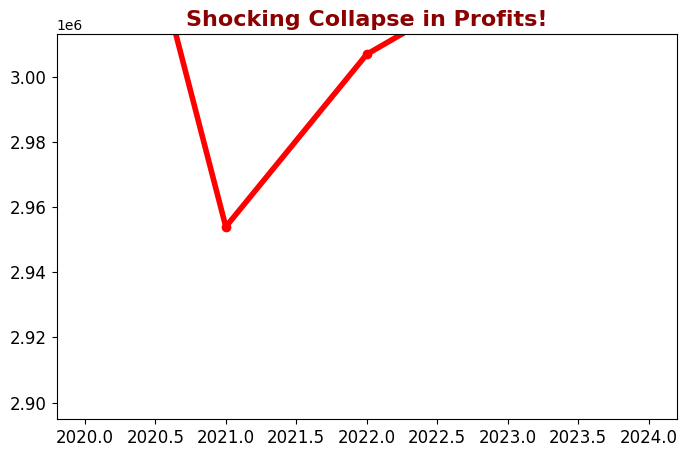

In [207]:
plt.figure(figsize=(8,5))
subset = coffee_df.groupby("Year")["Sales"].sum().reset_index()

# Wrong variable for title, truncated y-axis, misleading color & framing
plt.plot(subset["Year"], subset["Sales"], color="red", linewidth=4, marker="o")
plt.ylim(subset["Sales"].min() * 0.98, subset["Sales"].min() * 1.02)  # extreme truncation
plt.title("Shocking Collapse in Profits!", fontsize=16, fontweight="bold", color="darkred")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Write your notes about bad chart #1 here:

* Potentially misleading title
* Missing context: X-axis needs label 
* Missing context: Y-axis needs label
* Directly label points on line
* Rethink color of line in chart
* Rethink scale along x-axis
* Misleading narrative: scale of y-axis is extremely truncated

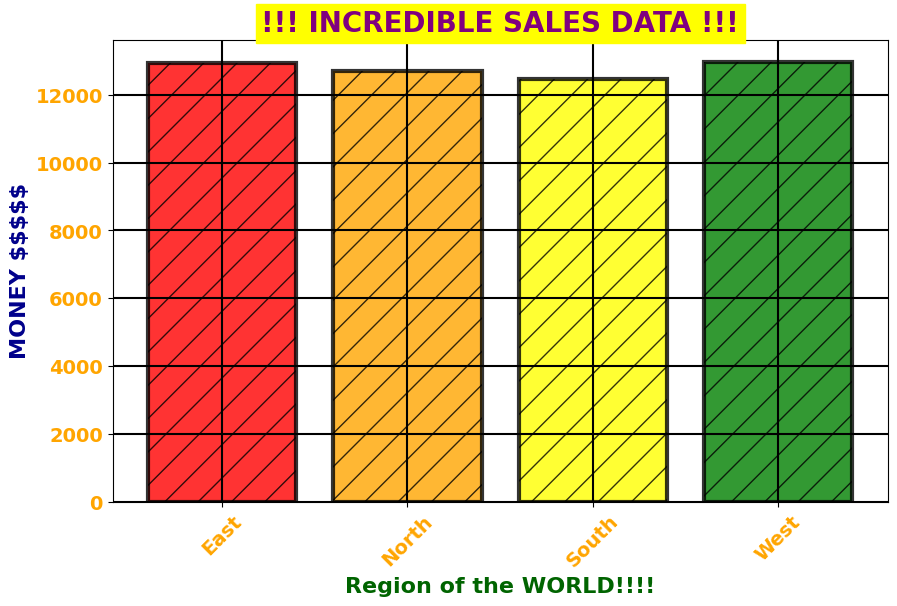

In [208]:
plt.figure(figsize=(10,6))
avg_sales = coffee_df.groupby("Region")["Sales"].mean().reset_index()

colors = ["red","orange","yellow","green","blue","purple"]

plt.bar(avg_sales["Region"], avg_sales["Sales"], 
        color=colors, edgecolor="black", linewidth=3, hatch="/", alpha=0.8)
plt.title("!!! INCREDIBLE SALES DATA !!!", fontsize=20, fontweight="bold", color="purple", backgroundcolor="yellow")
plt.grid(True, which='both', color='black', linestyle='-', linewidth=1.5)
plt.xlabel("Region of the WORLD!!!!", fontsize=16, fontweight="bold", color="darkgreen")
plt.ylabel("MONEY $$$$$", fontsize=16, fontweight="bold", color="darkblue")
plt.xticks(rotation=45, fontsize=14, fontweight="bold", color="orange")
plt.yticks(fontsize=14, fontweight="bold", color="orange")
plt.show()


### Write your notes about bad chart #2 here:
* Bars are way too busy
* Chart visually noisy
* Needs more accessible color scheme
* Needs clearer title
* Labels aren't informative
* What's the duration of time for each measure of profit?

## Step 3: Your Turn – Make It Right

Now it’s your turn to fix things.  

- Start by thinking about a question you want to answer with this dataset.  
- Choose a visualization type that matches your question and the data structure.  
- Apply the best practices from our lessons: clear labeling, appropriate scale, purposeful color, simplicity, and accessibility.  
- Be honest - don’t manipulate the chart to make a point that the data doesn’t support.  

When you’re done, add your chart(s) below. You may create more than one if it helps tell the story better.  


In [209]:
# Your GOOD visualization(s) here
# coffee_df.head(50)
yearly_avg_profit = coffee_df.groupby("Year")["Profit"].mean().round(2)
yearly_avg_profit

Year
2020    3866.04
2021    3701.56
2022    3761.44
2023    3824.22
2024    4007.91
Name: Profit, dtype: float64

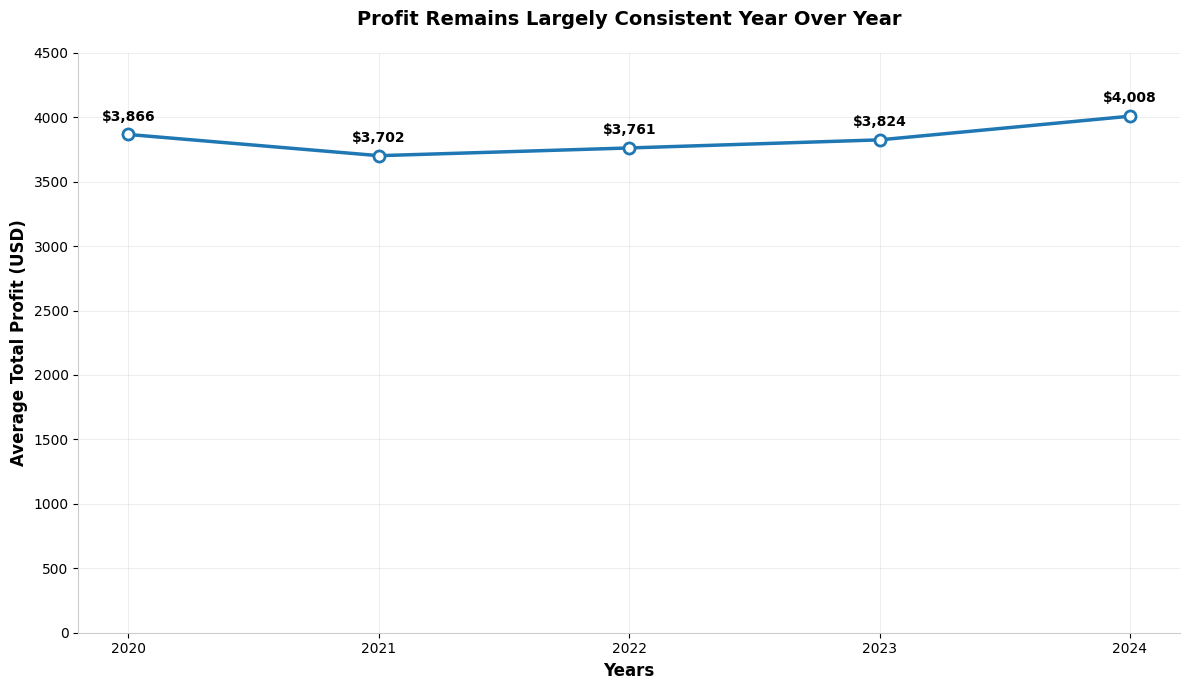

In [219]:
plt.figure(figsize=(12,7))

plt.plot(
    yearly_avg_profit.index,
    yearly_avg_profit.values,
    linewidth = 2.5,
    marker = "o",
    markersize = 8,
    markerfacecolor = "#FFFFFF",
    markeredgewidth = 2,
    )

plt.xlabel("Years", fontsize = 12, fontweight = "bold")
plt.ylabel("Average Total Profit (USD)", fontsize = 12, fontweight = "bold")
plt.title("Profit Remains Largely Consistent Year Over Year", fontsize = 14, fontweight = "bold", pad = 20)

for x, y in zip(yearly_avg_profit.index, yearly_avg_profit.values):
    plt.annotate(f"${y:,.0f}",
                    (x, y),
                    textcoords = "offset points", 
                    xytext = (0, 10),
                    ha = "center",
                    fontsize = 10,
                    fontweight = "bold")

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#CCCCCC")
ax.spines["bottom"].set_color("#CCCCCC")
ax.set_xticks(yearly_avg_profit.index)
ax.set_xticklabels([int(year) for year in yearly_avg_profit.index])

plt.grid(True, alpha = 0.3, linestyle = "-", linewidth = 0.5)

plt.ylim(0, 4500)

plt.tight_layout()
plt.show()

### Chart improvements
* Larger figure size for improved readability
* Thicker lines and larger markers for more visible data points
* Labels for exact values on each data point
* Improved typography and spacing
* Added grid for improved readability

In [211]:
df_2024 = coffee_df[coffee_df["Year"] == 2024]
df_2024

,Year,Month,Region,Category,Sales,Profit
960,2024,January,East,Espresso,7665,2786.74
961,2024,January,East,Lattes,7322,1899.14
962,2024,January,East,Tea,5999,1206.71
963,2024,January,East,Pastries,8726,2845.04
964,2024,January,East,Beans,16416,4583.91
...,...,...,...,...,...,...
1195,2024,December,South,Espresso,21111,8204.05
1196,2024,December,South,Lattes,8953,3452.85
1197,2024,December,South,Tea,18078,4329.57
1198,2024,December,South,Pastries,5685,1151.46


In [213]:
avg_region_category_sales = df_2024.groupby(["Region", "Category"])["Sales"].mean().reset_index()
avg_region_category_sales

,Region,Category,Sales
0,East,Beans,12346.916667
1,East,Espresso,11069.916667
2,East,Lattes,13629.416667
3,East,Pastries,15098.583333
4,East,Tea,12120.166667
5,North,Beans,15720.833333
6,North,Espresso,13731.166667
7,North,Lattes,13063.583333
8,North,Pastries,11957.583333
9,North,Tea,13894.500000


In [214]:
pivot_data = avg_region_category_sales.pivot_table(
    index = "Region",
    values = "Sales",
    columns = "Category"
)

pivot_data.reset_index()

Category,Region,Beans,Espresso,Lattes,Pastries,Tea
0,East,12346.916667,11069.916667,13629.416667,15098.583333,12120.166667
1,North,15720.833333,13731.166667,13063.583333,11957.583333,13894.500000
2,South,13027.500000,14529.166667,11165.166667,11933.666667,11261.750000
3,West,16150.750000,13501.583333,15181.083333,14946.083333,12368.250000


<Axes: xlabel='Region'>

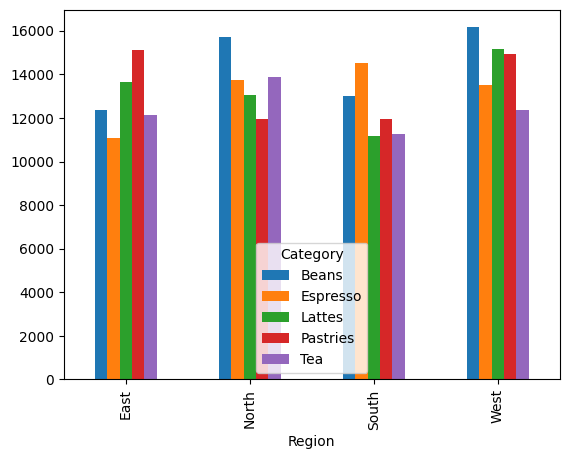

In [ ]:
pivot_data.plot(kind = "bar")

use seaborn lol